In [1]:
from b_tools.preprocess import get_standardized_measures

In [2]:
seq = get_standardized_measures('results/sequential_100.csv')
seq_time_tot = seq['TOTAL'].mean()

In [3]:
data = get_standardized_measures('results/thr_100.csv', excluded_columns=['P_DEGREE'])

In [4]:
data

,P_DEGREE,READING,HUFFBUILD,TOTAL
0,1,196172394,132830,196305224
1,1,198490702,133751,198624453
2,1,196991550,133440,197124990
3,1,196010770,131787,196142557
4,1,198124655,135204,198259859
...,...,...,...,...
315,64,16510398,126978,16637376
316,64,15905764,129833,16035597
317,64,17011819,128381,17140200
318,64,16398599,128290,16526889


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

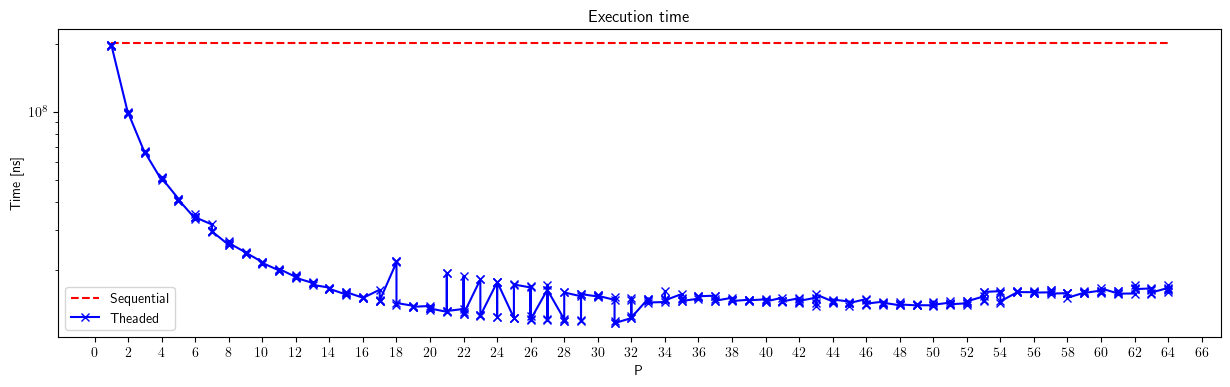

In [11]:
# setting up the plot
plt.figure(figsize=(15,4))
plt.title('Execution time')
plt.xticks(range(0, len(data['P_DEGREE']), 2))
plt.xlabel("P")
plt.ylabel("Time [ns]")
plt.yscale('log')
# sequential
plt.plot(data['P_DEGREE'], [seq_time_tot for _ in range(len(data['P_DEGREE']))], '--r')
# parallel
plt.plot(data['P_DEGREE'], data['TOTAL'], 'x-b')

plt.legend(['Sequential', 'Theaded'])
plt.show()

# Outlier detection and mean

Here we remove the outliers for the data and we compute the mean

In [12]:
import pandas as pd

In [13]:
# compute the mean for each group
sp_data = data.groupby('P_DEGREE', as_index=False).mean()

In [14]:
sp_data

,P_DEGREE,READING,HUFFBUILD,TOTAL
0,1,197158014.2,133402.4,197291416.6
1,2,98937753.0,127569.6,99065322.6
2,3,66134725.8,127775.8,66262501.6
3,4,50757402.2,127669.6,50885071.8
4,5,40733275.6,129142.0,40862417.6
...,...,...,...,...
59,60,16011704.8,127258.6,16138963.4
60,61,15793834.2,127675.4,15921509.6
61,62,16362715.2,126621.6,16489336.8
62,63,16021717.6,127821.8,16149539.4


# Speedup

Let's calculate the speedup $\frac{T_{seq}}{T(P)}$

In [15]:
sp_data['S_p'] = sp_data['TOTAL'].map(lambda x: seq_time_tot / x)

In [16]:
sp_data

,P_DEGREE,READING,HUFFBUILD,TOTAL,S_p
0,1,197158014.2,133402.4,197291416.6,1.021988
1,2,98937753.0,127569.6,99065322.6,2.035318
2,3,66134725.8,127775.8,66262501.6,3.042889
3,4,50757402.2,127669.6,50885071.8,3.962448
4,5,40733275.6,129142.0,40862417.6,4.934349
...,...,...,...,...,...
59,60,16011704.8,127258.6,16138963.4,12.493333
60,61,15793834.2,127675.4,15921509.6,12.663965
61,62,16362715.2,126621.6,16489336.8,12.227869
62,63,16021717.6,127821.8,16149539.4,12.485152


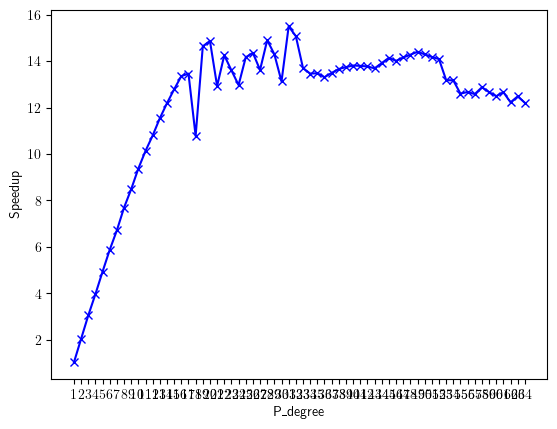

In [17]:
# plot results
plt.xticks(sp_data['P_DEGREE'])
plt.xlabel('P_{degree}')
plt.ylabel('Speedup')

plt.plot(sp_data['P_DEGREE'], sp_data['S_p'], 'x-b')

# Scalability

Compute the scalability that is $S_n=\frac{T(1)}{T(N)}$

In [18]:
time_n0 = sp_data[sp_data['P_DEGREE'] == 1]['TOTAL']
time_n0

0    197291416.6
Name: TOTAL, dtype: float64

In [19]:
sp_data['S_c'] = sp_data['TOTAL'].map(lambda x: time_n0 / x)

/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


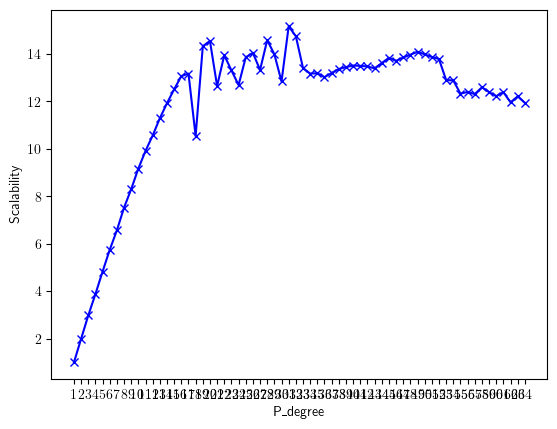

In [20]:
# plot results
plt.xticks(sp_data['P_DEGREE'])
plt.xlabel('P_{degree}')
plt.ylabel('Scalability')

plt.plot(sp_data['P_DEGREE'], sp_data['S_c'], 'x-b')